In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
DATA_PATH = '../data/'


users = pd.read_csv(DATA_PATH + 'users.csv')
plans = pd.read_csv(DATA_PATH + 'plans.csv')
bill_headers = pd.read_csv(DATA_PATH + 'bill_headers.csv')
bill_items = pd.read_csv(DATA_PATH + 'bill_items.csv')
usage_daily = pd.read_csv(DATA_PATH + 'usage_daily.csv')
vas_catalog = pd.read_csv(DATA_PATH + 'vas_catalog.csv')
premium_sms_catalog = pd.read_csv(DATA_PATH + 'premium_sms_catalog.csv')
add_on_packs = pd.read_csv(DATA_PATH + 'add_on_packs.csv')

In [4]:
users.head(5)

,user_id,name,current_plan_id,type,msisdn
0,1000,Kullanıcı 1,3,retail,5071411667
1,1001,Kullanıcı 2,4,retail,5514843891
2,1002,Kullanıcı 3,5,retail,5826593462
3,1003,Kullanıcı 4,2,retail,5325831531
4,1004,Kullanıcı 5,1,corporate,5350625293


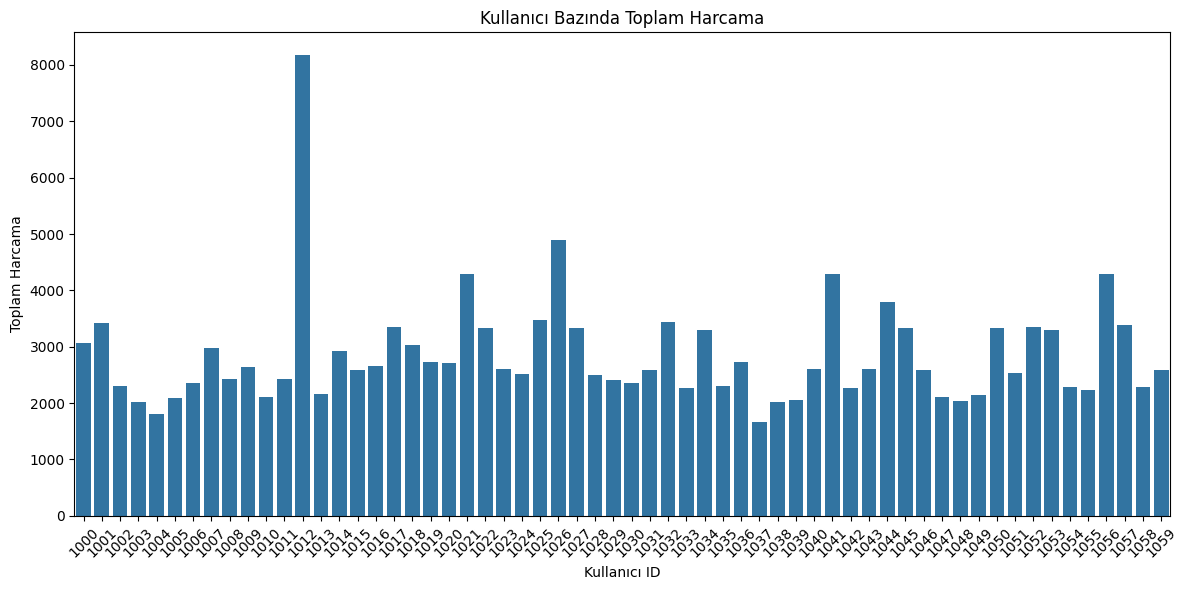

In [7]:

user_spending = bill_headers.groupby('user_id')['total_amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='user_id', y='total_amount', data=user_spending)
plt.xlabel('Kullanıcı ID')
plt.ylabel('Toplam Harcama')
plt.title('Kullanıcı Bazında Toplam Harcama')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

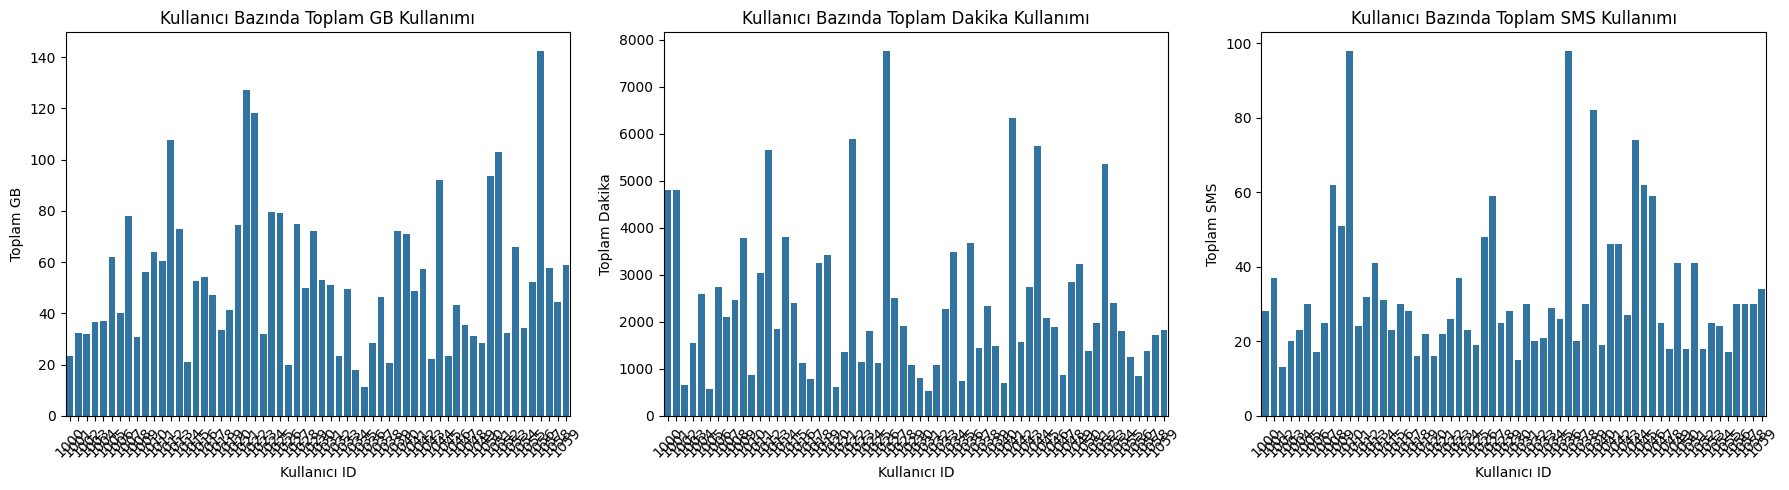

In [8]:
# Kullanıcı bazında toplam veri (GB), dakika ve SMS kullanımı
usage_summary = usage_daily.groupby('user_id').agg({
    'mb_used': 'sum',
    'minutes_used': 'sum',
    'sms_used': 'sum'
}).reset_index()

# MB'yi GB'ye çevir
usage_summary['gb_used'] = usage_summary['mb_used'] / 1024

# Grafik: Kullanıcı bazında toplam GB, dakika ve SMS kullanımı
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='user_id', y='gb_used', data=usage_summary, ax=axes[0])
axes[0].set_title('Kullanıcı Bazında Toplam GB Kullanımı')
axes[0].set_xlabel('Kullanıcı ID')
axes[0].set_ylabel('Toplam GB')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='user_id', y='minutes_used', data=usage_summary, ax=axes[1])
axes[1].set_title('Kullanıcı Bazında Toplam Dakika Kullanımı')
axes[1].set_xlabel('Kullanıcı ID')
axes[1].set_ylabel('Toplam Dakika')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='user_id', y='sms_used', data=usage_summary, ax=axes[2])
axes[2].set_title('Kullanıcı Bazında Toplam SMS Kullanımı')
axes[2].set_xlabel('Kullanıcı ID')
axes[2].set_ylabel('Toplam SMS')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

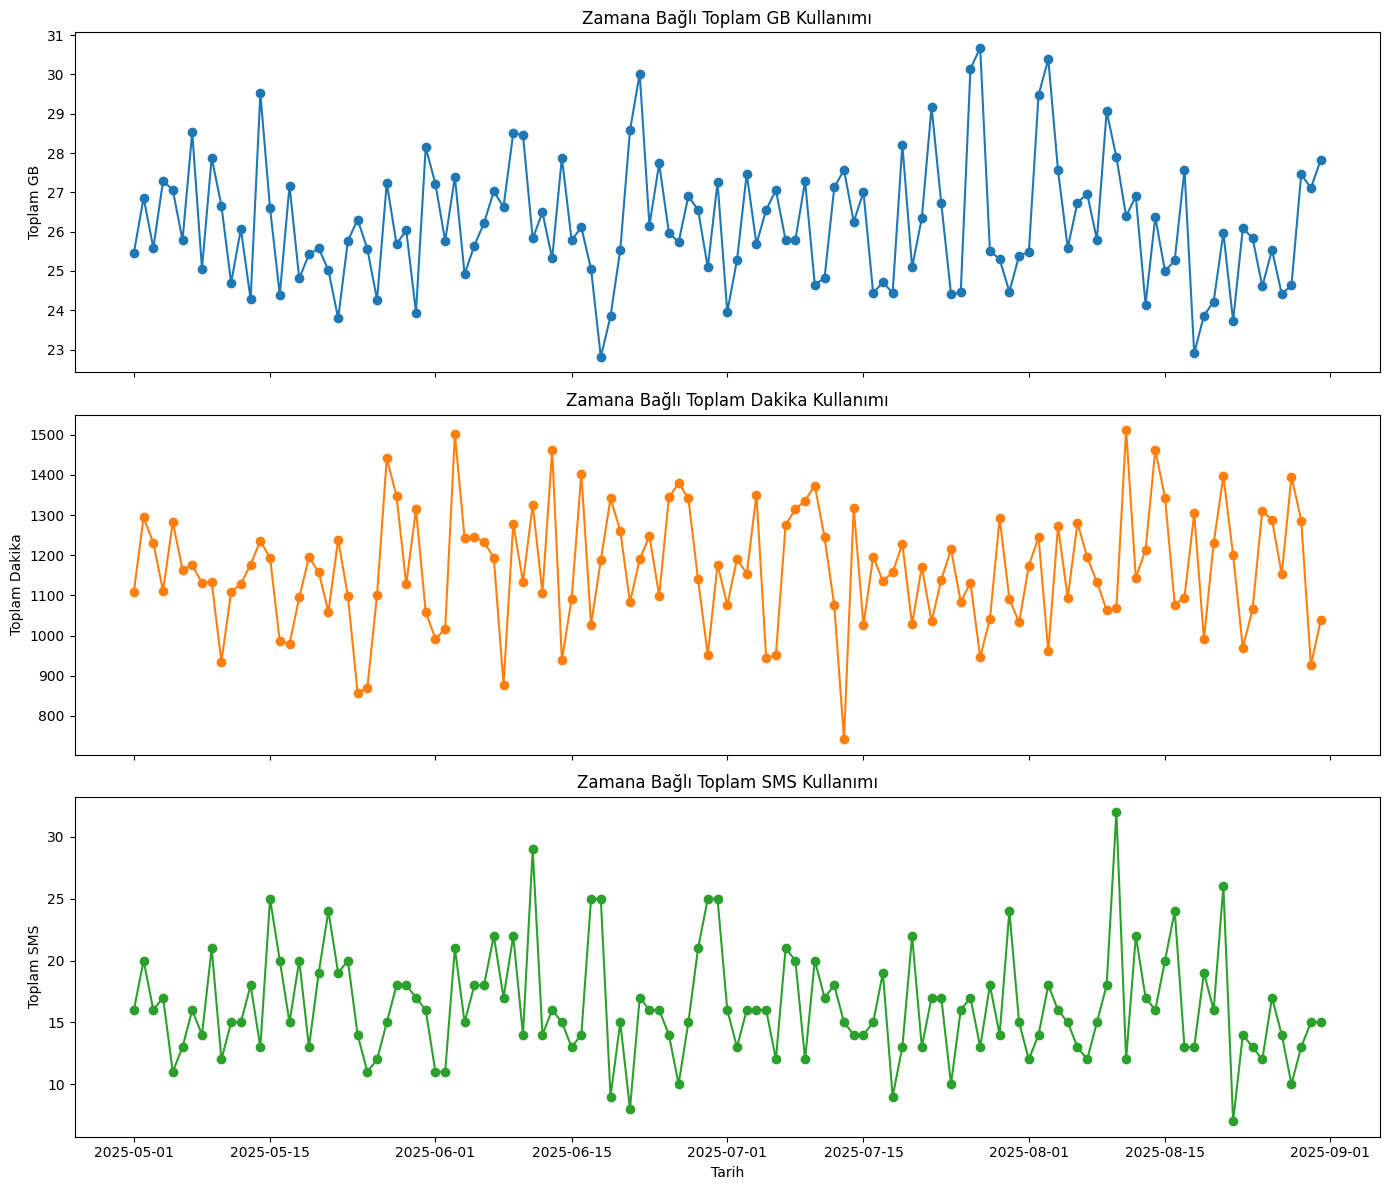

In [12]:
# Tarihleri datetime'a çevir
usage_daily['date'] = pd.to_datetime(usage_daily['date'])

# GB, dakika ve SMS için zamana bağlı toplam kullanım (tüm kullanıcılar)
daily_usage = usage_daily.groupby('date').agg({
    'mb_used': 'sum',
    'minutes_used': 'sum',
    'sms_used': 'sum'
}).reset_index()
daily_usage['gb_used'] = daily_usage['mb_used'] / 1024

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# GB Kullanımı
axes[0].plot(daily_usage['date'], daily_usage['gb_used'], marker='o', color='tab:blue')
axes[0].set_title('Zamana Bağlı Toplam GB Kullanımı')
axes[0].set_ylabel('Toplam GB')

# Dakika Kullanımı
axes[1].plot(daily_usage['date'], daily_usage['minutes_used'], marker='o', color='tab:orange')
axes[1].set_title('Zamana Bağlı Toplam Dakika Kullanımı')
axes[1].set_ylabel('Toplam Dakika')

# SMS Kullanımı
axes[2].plot(daily_usage['date'], daily_usage['sms_used'], marker='o', color='tab:green')
axes[2].set_title('Zamana Bağlı Toplam SMS Kullanımı')
axes[2].set_ylabel('Toplam SMS')
axes[2].set_xlabel('Tarih')

plt.tight_layout()
plt.show()